In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances

In [3]:
plt.rcParams['figure.figsize'] = [30, 24]

In [4]:
vectors = np.loadtxt('good_vectors30k.txt', delimiter=',', dtype=np.int_)

In [5]:
qscores = np.load('good_qscores30k.npy')

In [6]:
cov = np.cov(vectors.T)

In [7]:
e_vals, e_vecs = np.linalg.eig(cov)

<BarContainer object of 26 artists>

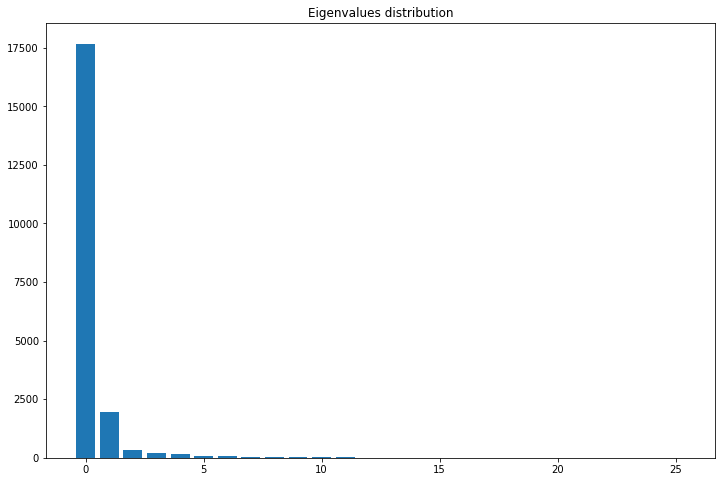

In [8]:
fig, ax = plt.subplots()
ax.set_title('Eigenvalues distribution')
plt.bar(np.arange(26), e_vals)

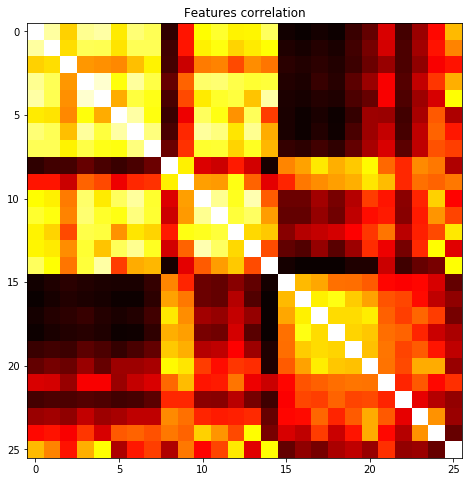

In [9]:
fig, ax = plt.subplots()
ax.set_title('Features correlation')
plt.imshow(np.corrcoef(vectors.T), cmap='hot')

In [10]:
print('Number of features to explain X percents of the variance:')
for p in [0.8, 0.9, 0.95, 0.98, 0.99]:
    pca = PCA(n_components=p, svd_solver='full')
    pca.fit(vectors)
    print(f'var = {p} n_features = {pca.n_components_}')

Number of features to explain X percents of the variance:
var = 0.8 n_features = 1
var = 0.9 n_features = 2
var = 0.95 n_features = 3
var = 0.98 n_features = 5
var = 0.99 n_features = 8


In [7]:
N_POINTS = 100000
MAX_SIZE = 10000
indices = np.random.randint(0, MAX_SIZE, N_POINTS), np.random.randint(0, MAX_SIZE, N_POINTS)

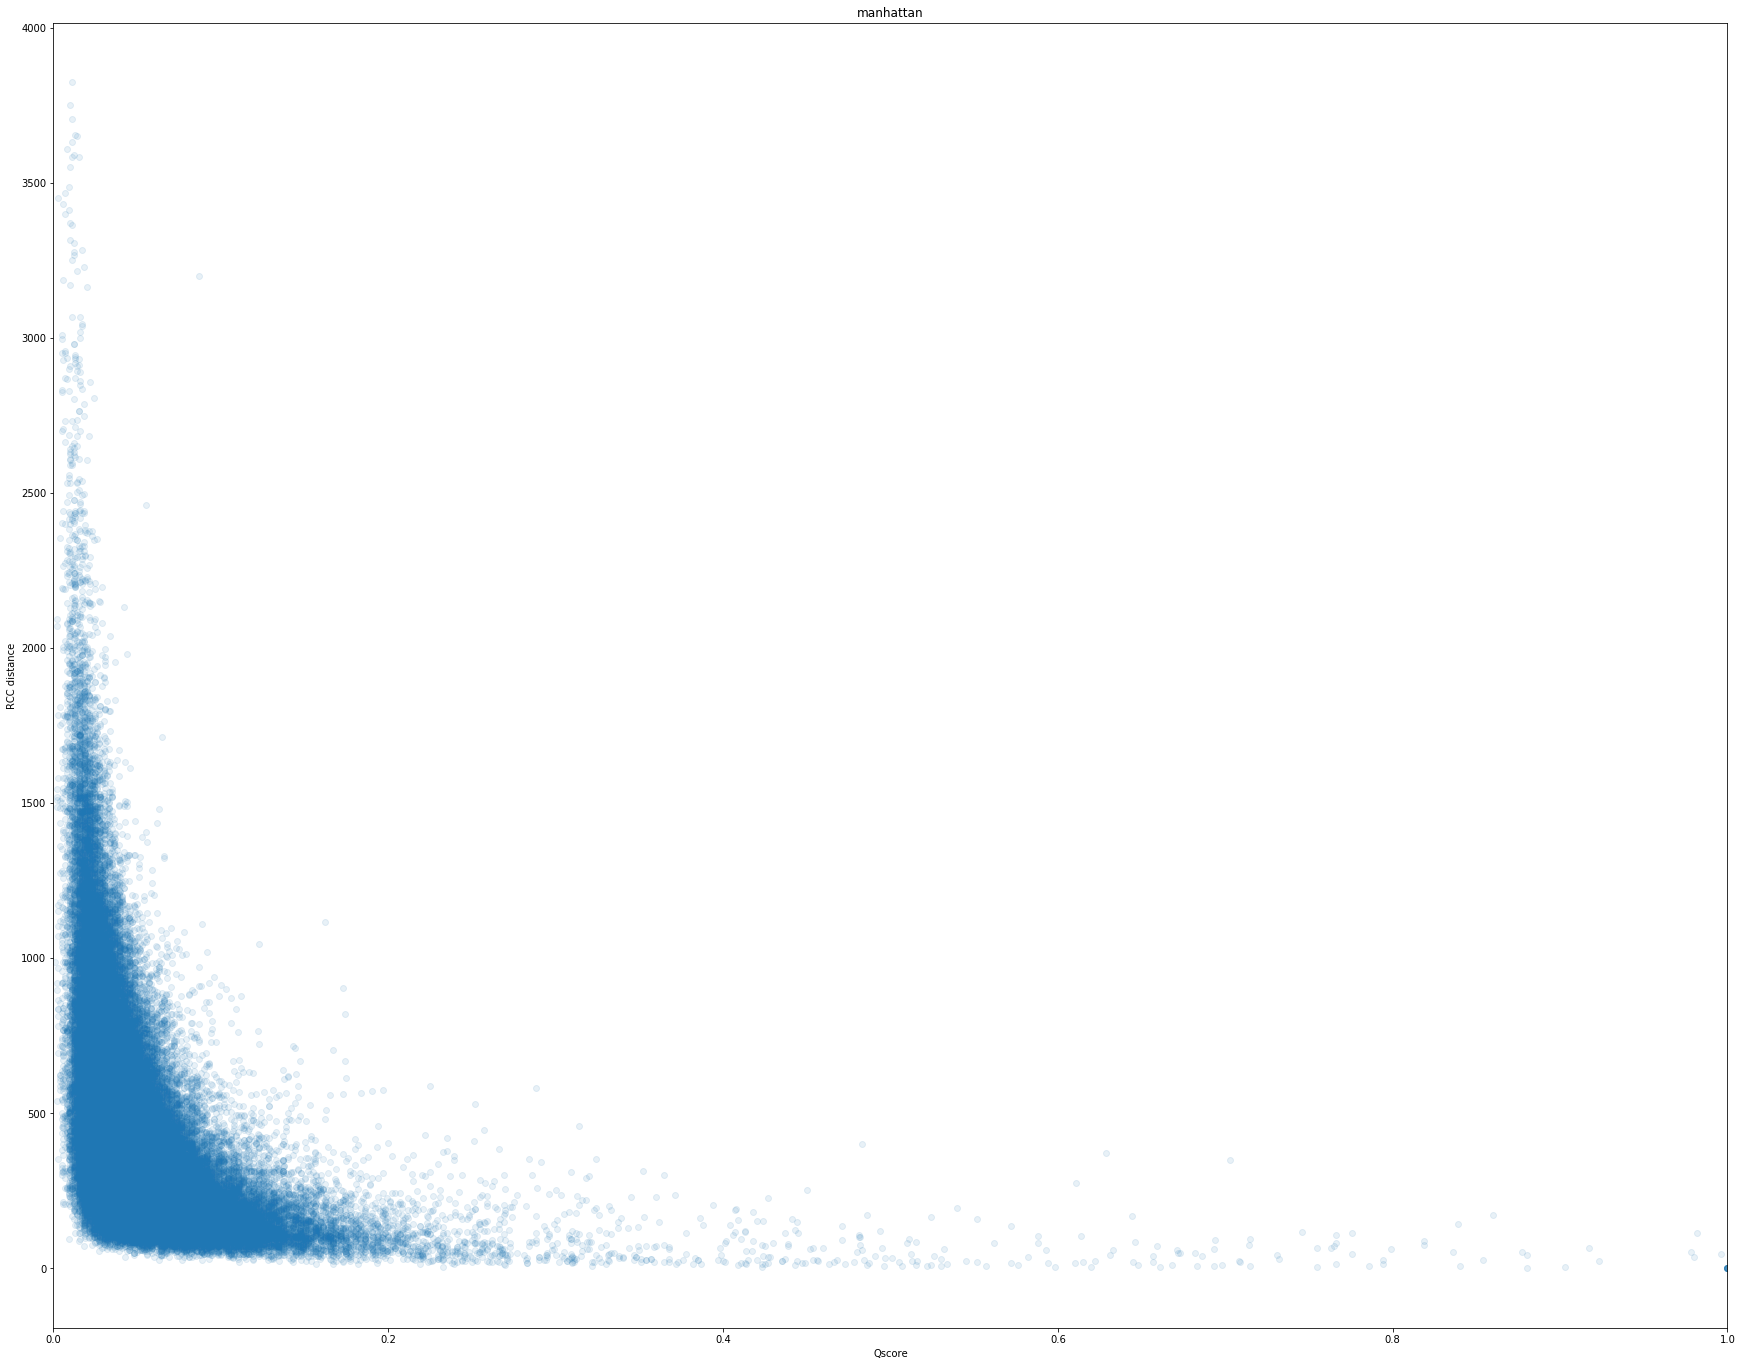

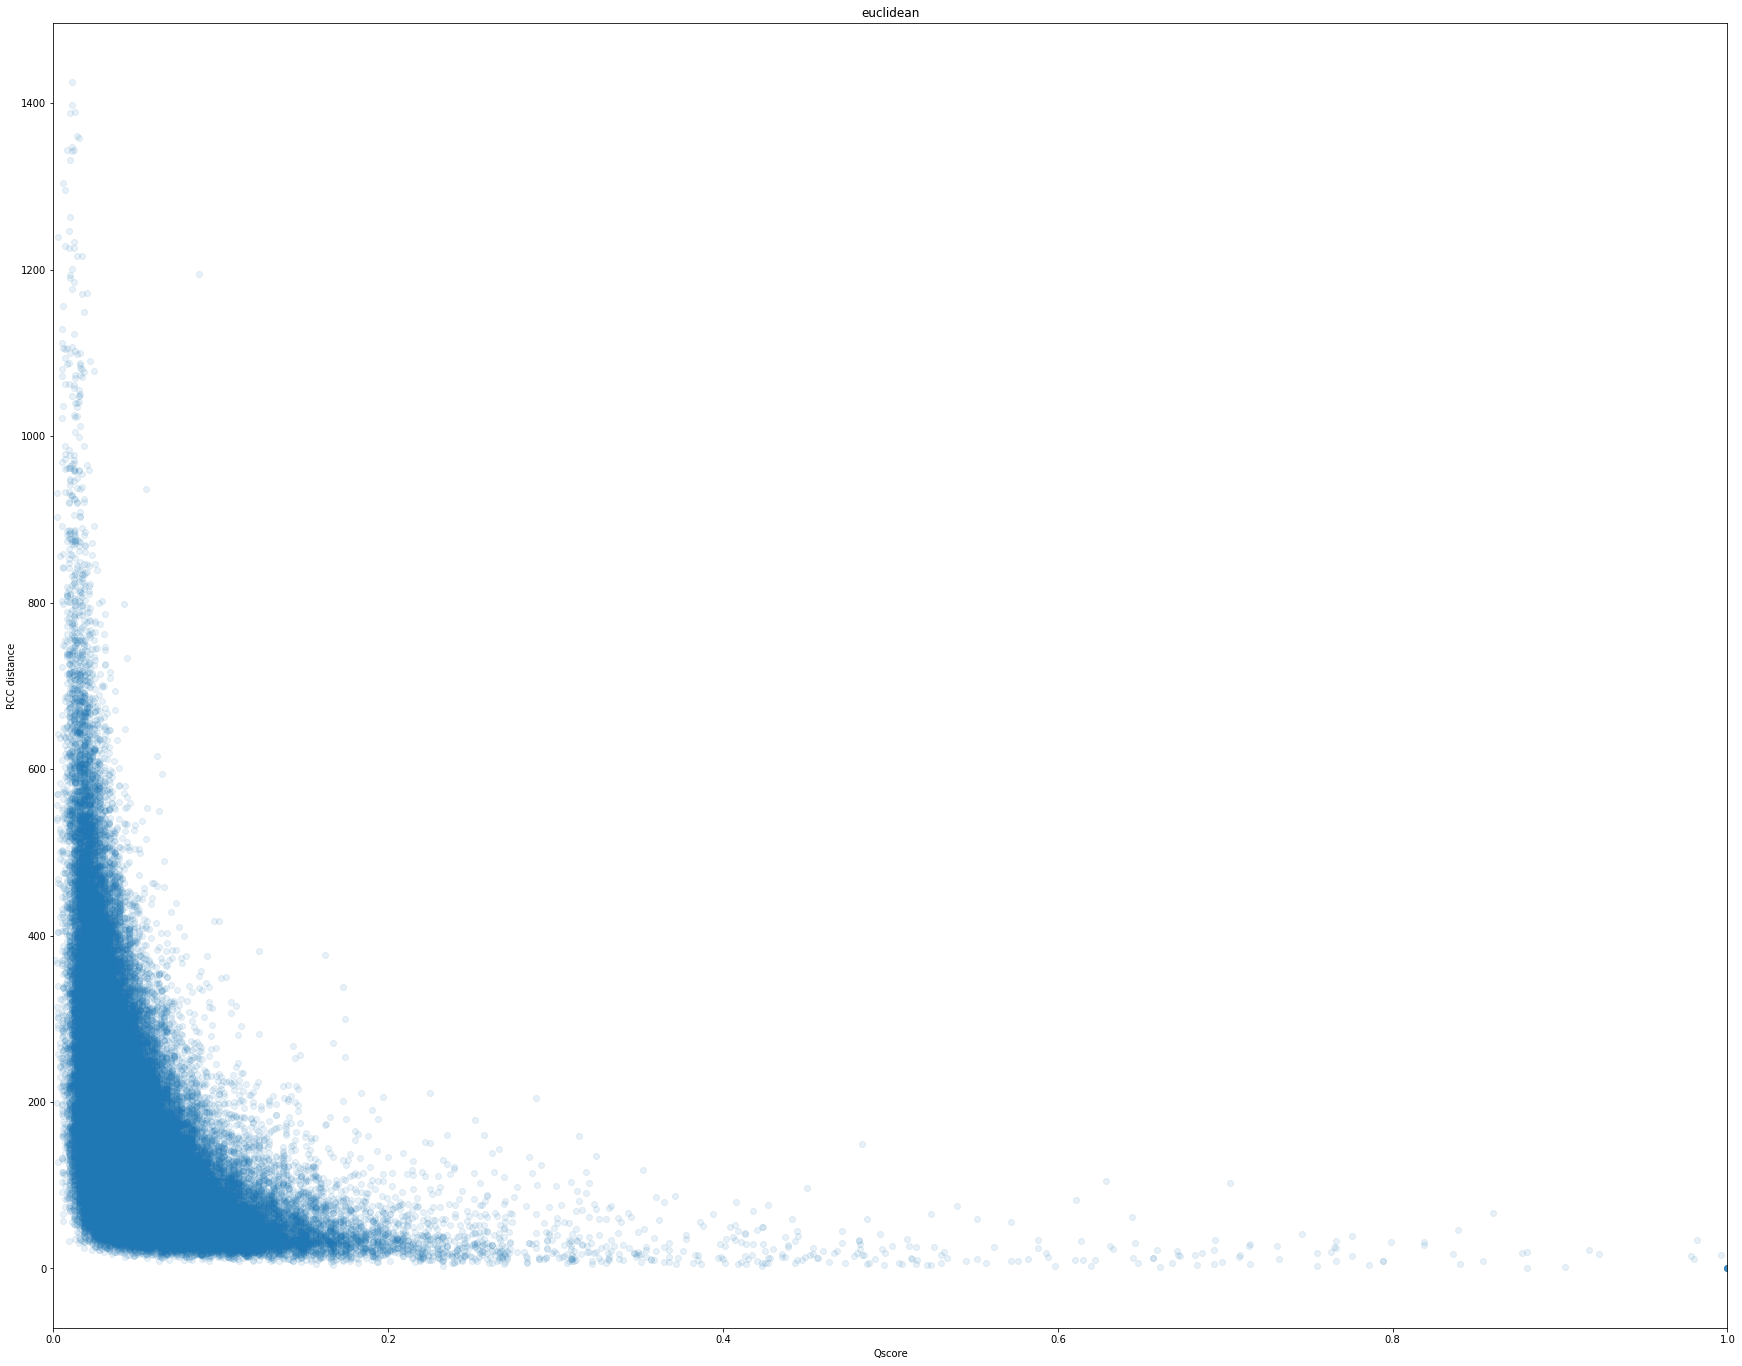

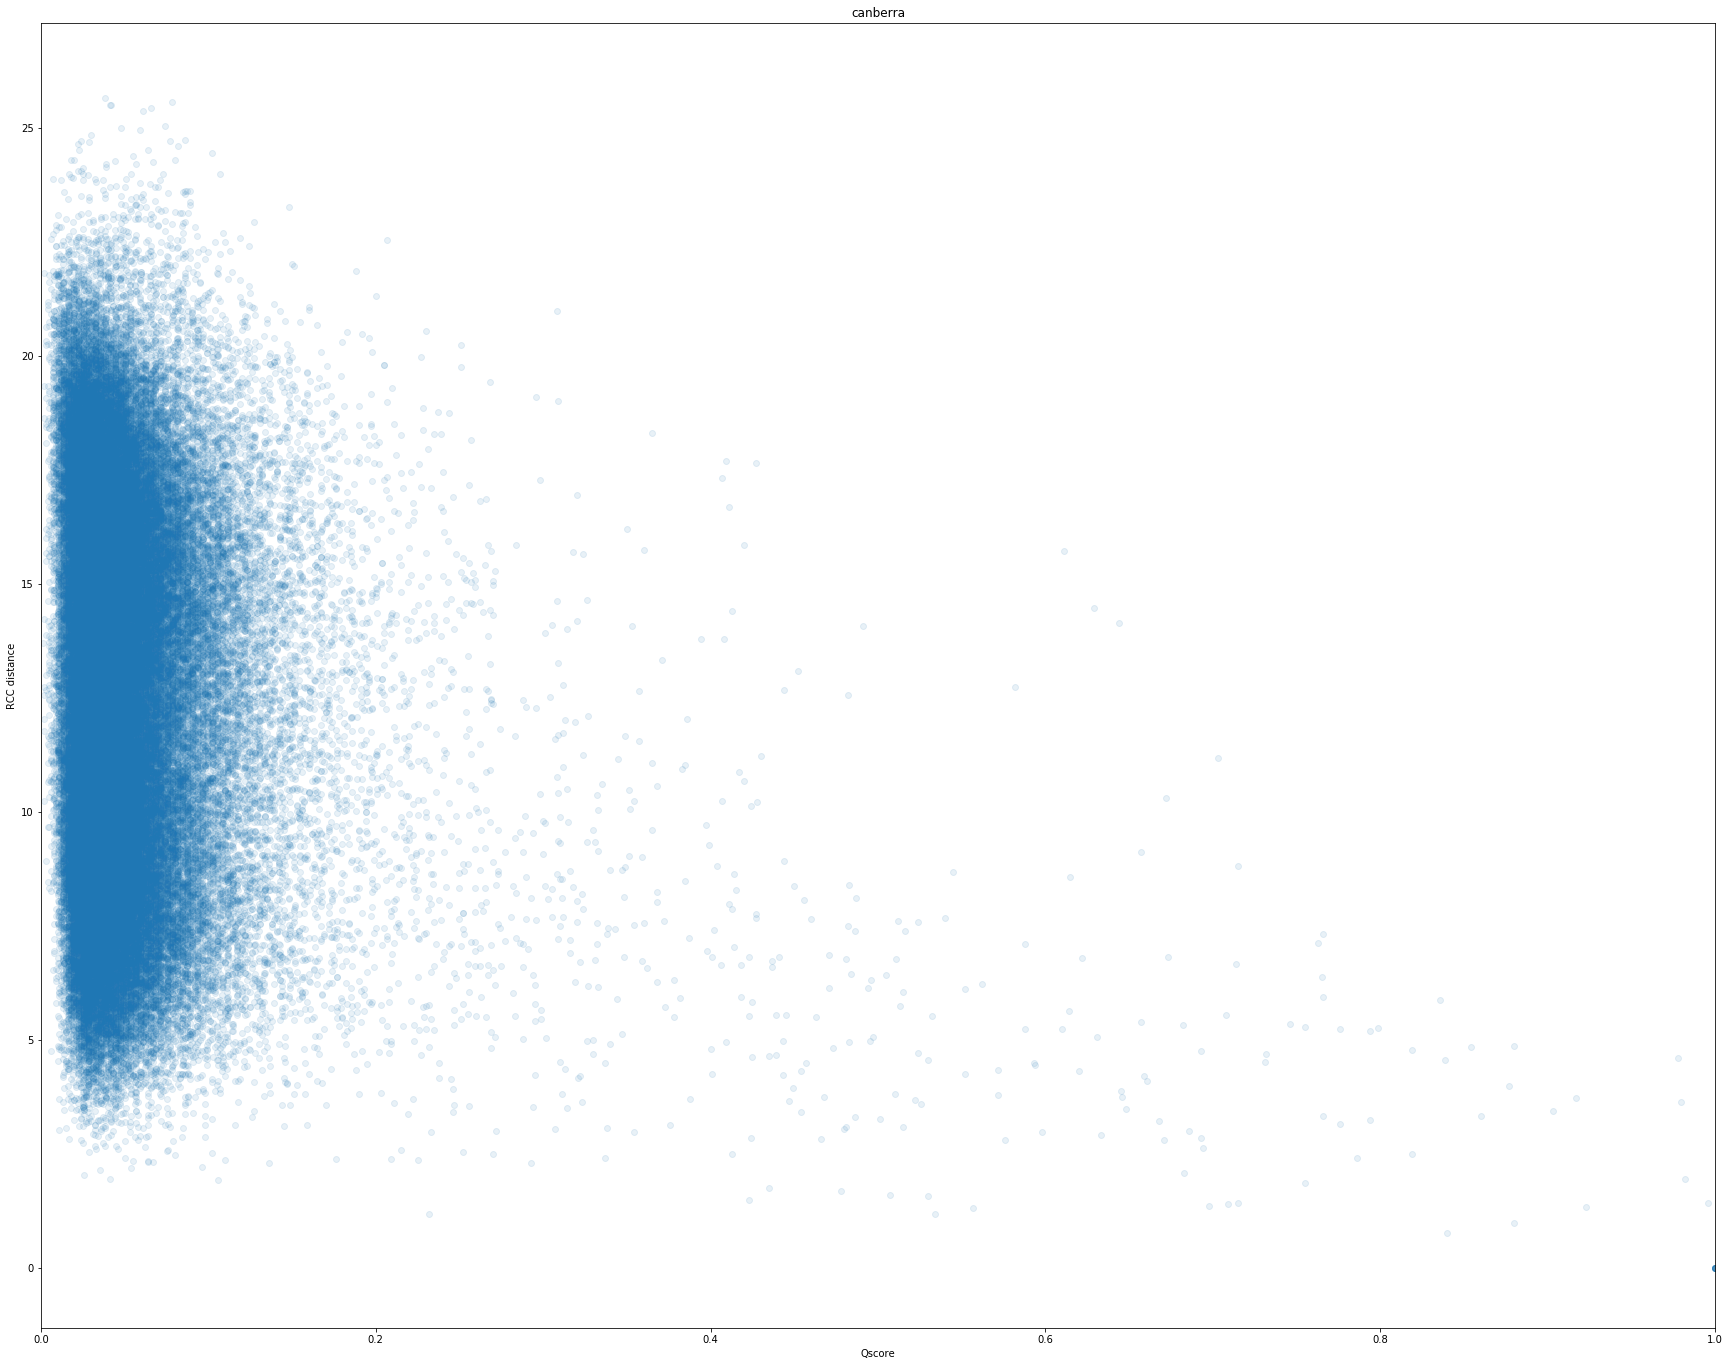

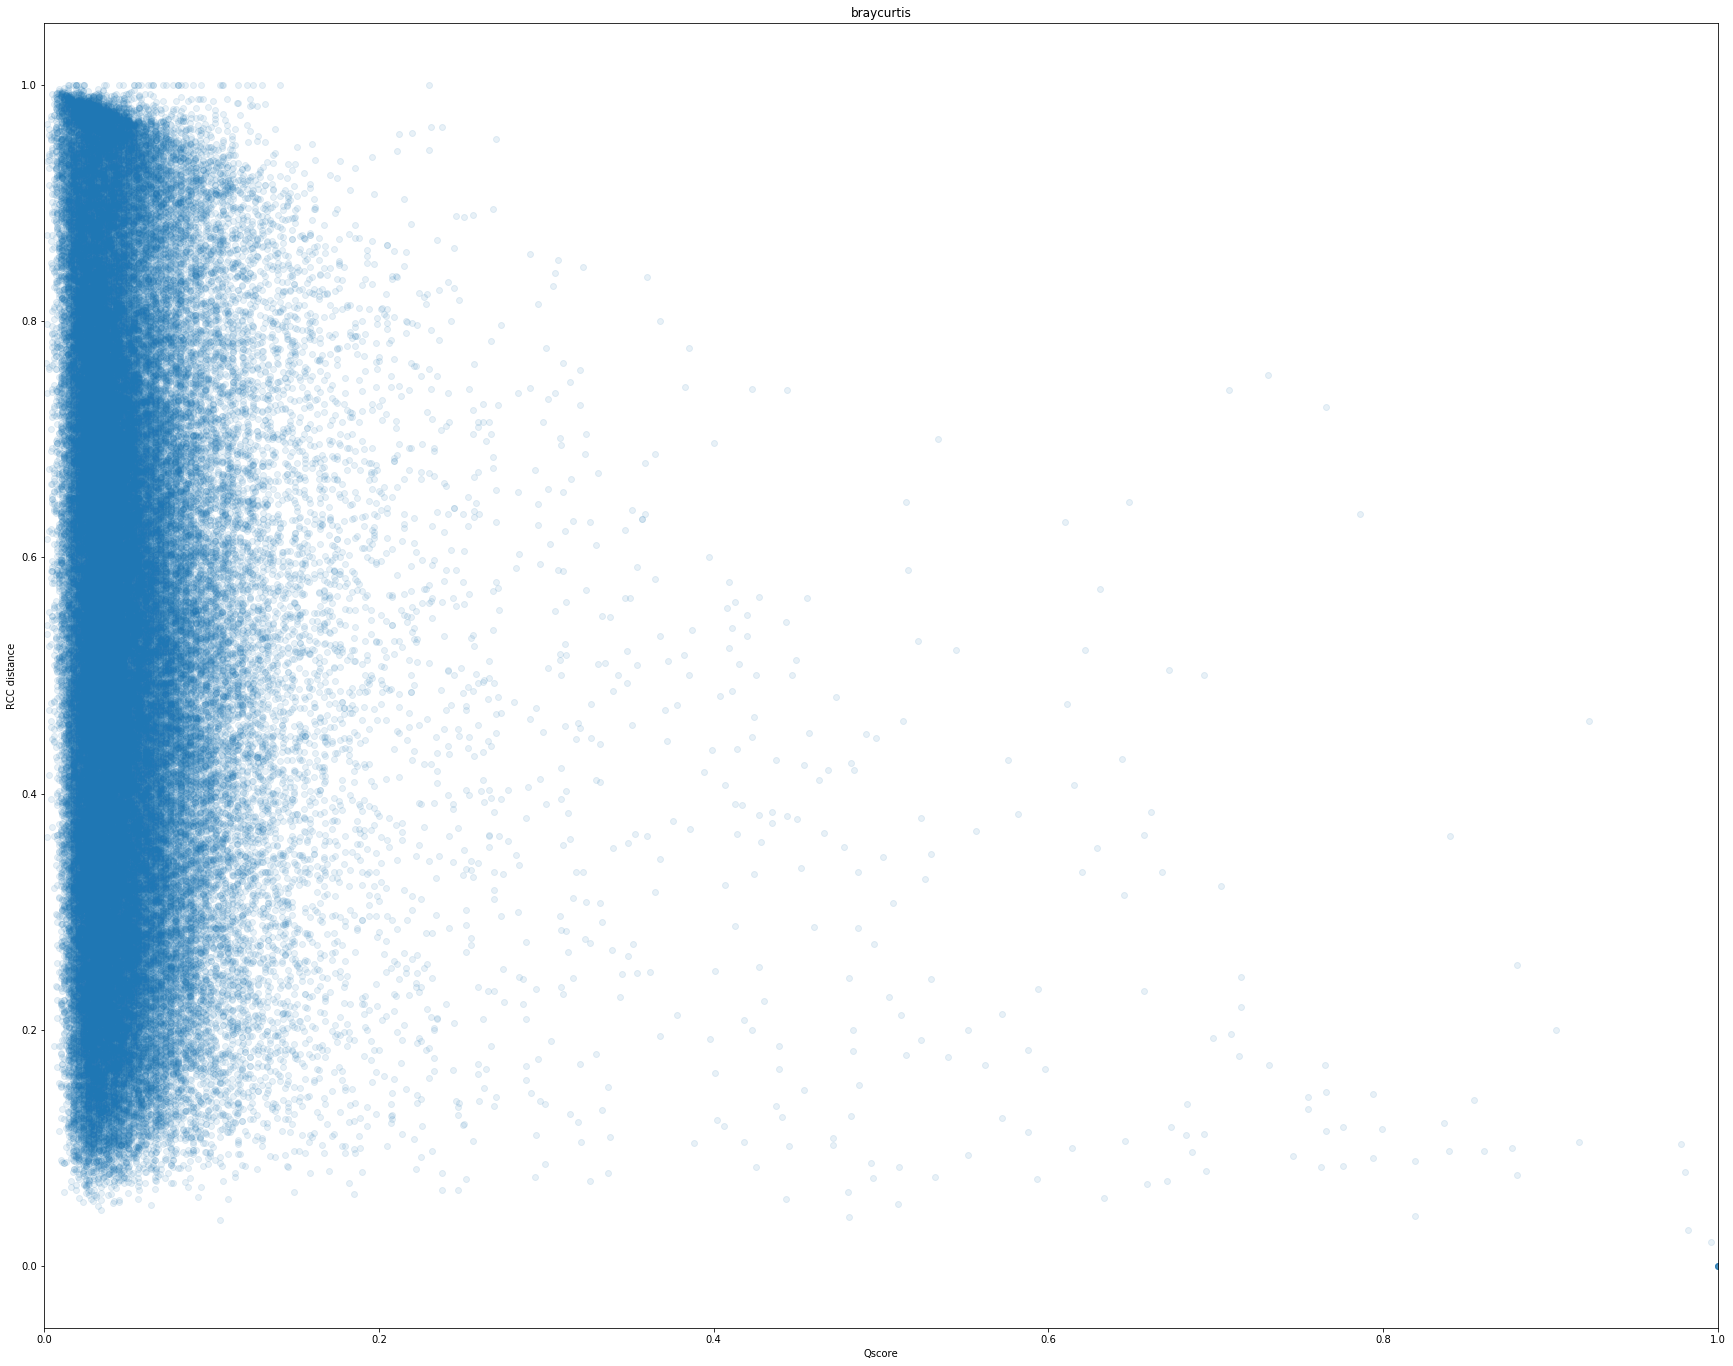

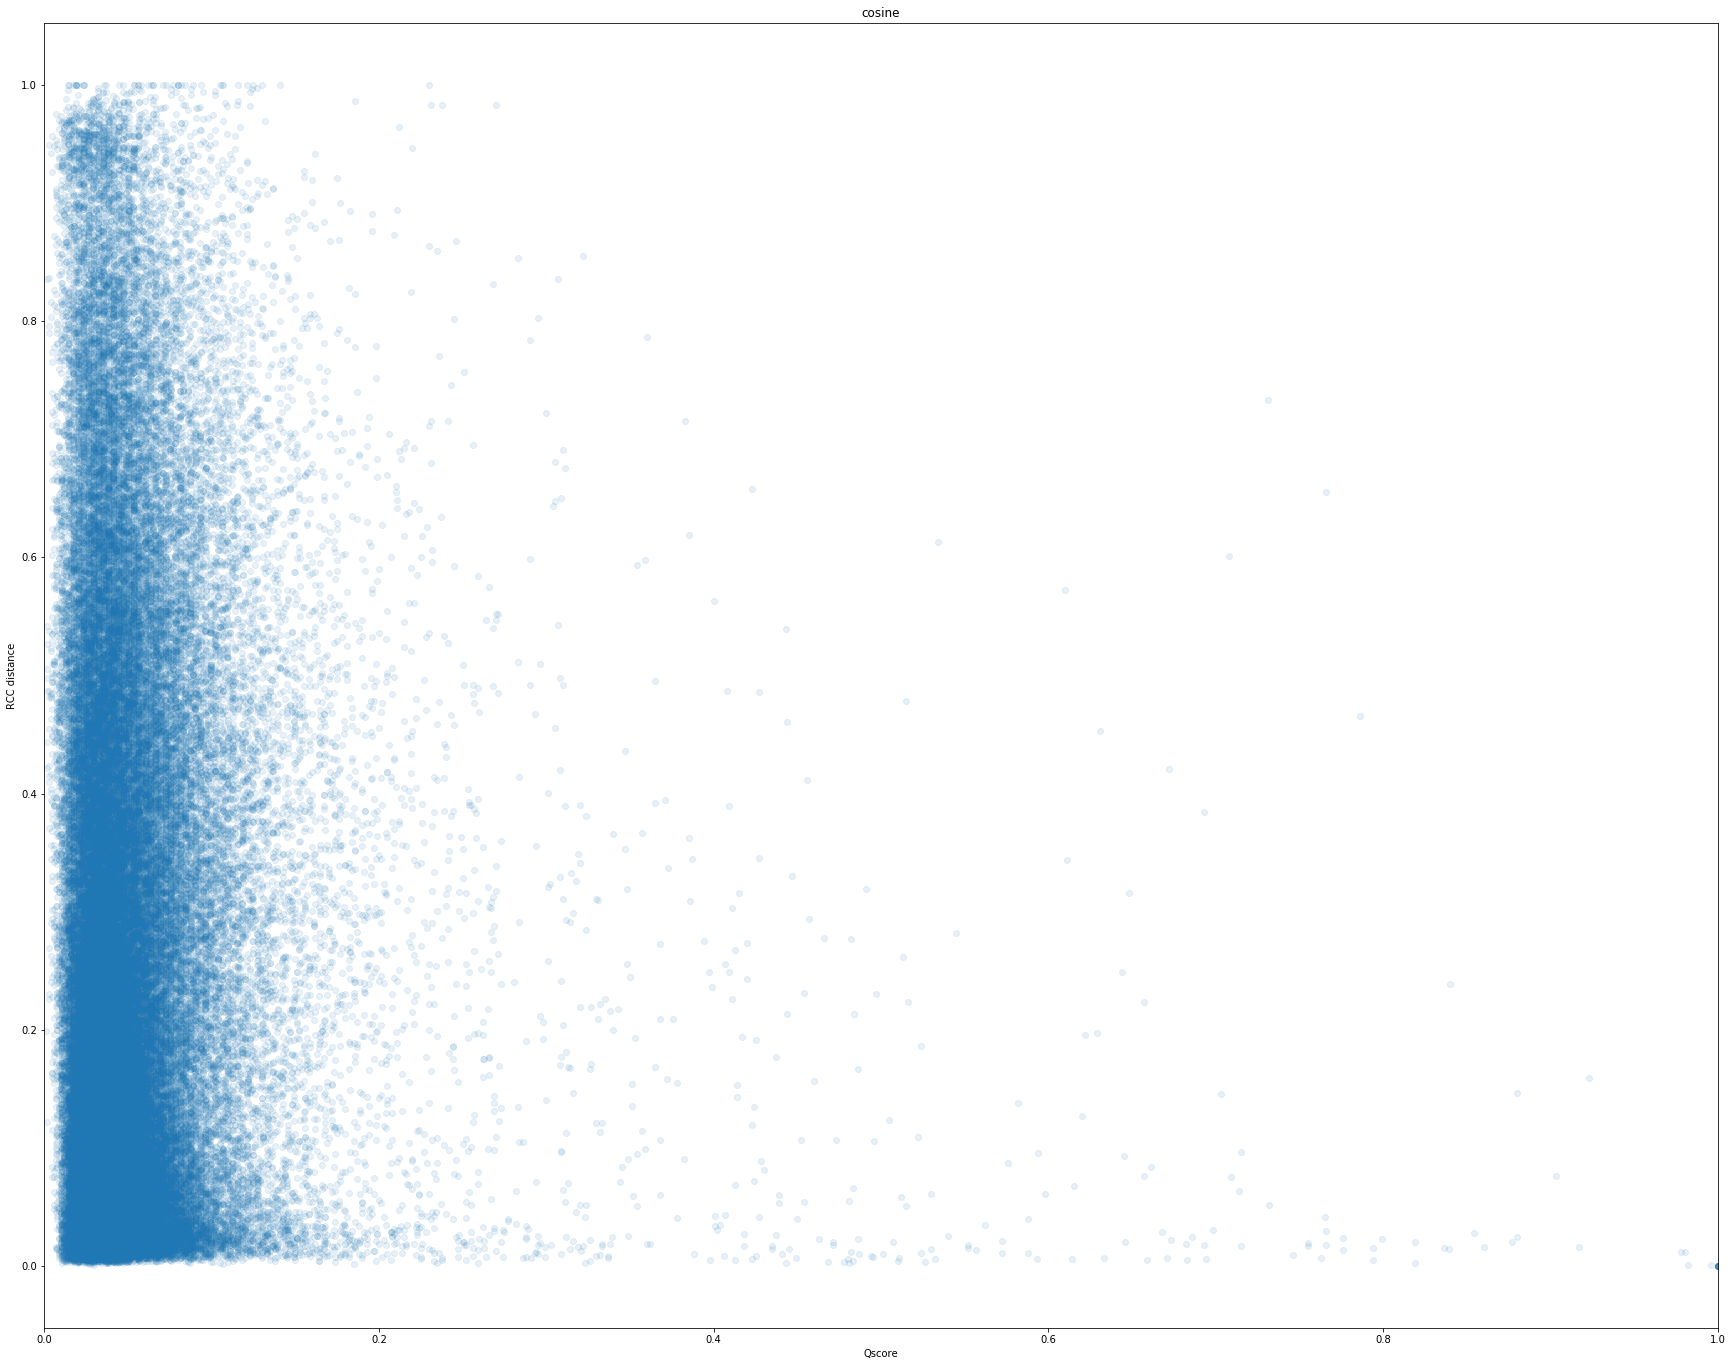

In [10]:
for dist in ['manhattan', 'euclidean', 'canberra', 'braycurtis', 'cosine']:
    distances = pairwise_distances(vectors[:MAX_SIZE], metric=dist)
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_title(dist)
    ax.set_xlabel('Qscore')
    ax.set_ylabel('RCC distance')
    plt.scatter(qscores[indices], distances[indices], alpha=0.1)

In [106]:
reduced = PCA(n_components=2).fit_transform(vectors)

In [107]:
kmeans = MiniBatchKMeans(n_clusters=20)

In [108]:
kmeans.fit(reduced)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=20,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [16]:
new = PCA(n_components=2).fit_transform(vectors)

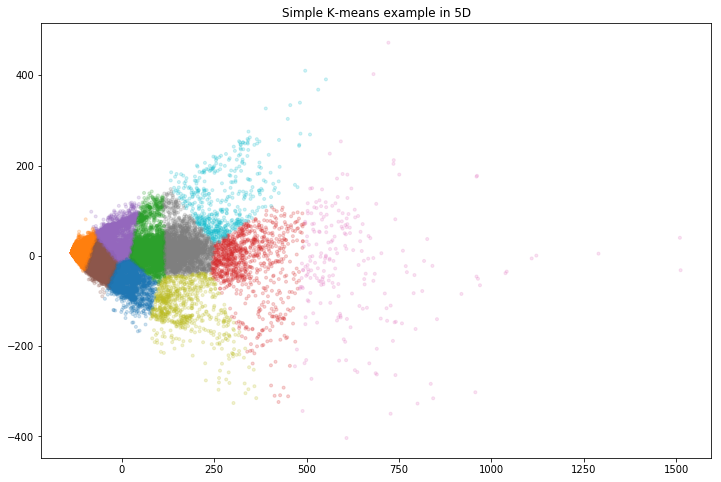

In [30]:
fig, ax = plt.subplots()
ax.set_title('Simple K-means example in 5D')
plt.scatter(new.T[0], new.T[1], c=kmeans.labels_, alpha=0.2, marker='.', cmap='tab10')

In [18]:
count_all = vectors.shape[0]

In [19]:
all_indices = set(range(count_all))

In [90]:
dists = pairwise_distances(kmeans.cluster_centers_)
np.fill_diagonal(dists, np.inf)
closest_cluster = np.argsort(dists, axis=0)[:5].T
print(closest_cluster)
np.argmin(dists, axis=0)

[[10  6 19  9 14]
 [ 7  8  5 18 17]
 [12 13  6 19 16]
 [ 8 17  1  5  7]
 [ 5  7 14 17 15]
 [ 7  1  4  8 17]
 [ 0 19 12 10 11]
 [ 5  1 18 14  8]
 [ 3  1 17  5  7]
 [18 14 10  0 11]
 [ 0 14 15  9 19]
 [ 9  0  6 10 18]
 [19  6  2  0 15]
 [ 2  6 12 11  0]
 [ 7 10 18  5  4]
 [10  4 19 14  0]
 [ 2 13 12  6 19]
 [ 8  5  3  1  7]
 [ 7  1 14  9  5]
 [ 0  6 15 12 10]]


array([10,  7, 12,  8,  5,  7,  0,  5,  3, 18,  0,  9, 19,  2,  7, 10,  2,
        8,  7,  0])

In [21]:
for n_cluster in range(10):
    print(f'Processing cluster no. {n_cluster}')
    points = np.nonzero(kmeans.labels_ == n_cluster)[0]
    closest = np.nonzero(kmeans.labels_ == closest_cluster[n_cluster])[0]
    indices = np.setdiff1d(np.setdiff1d(np.arange(count_all), points), closest)
    s = 0
    for point in points:
        s += (np.sum(qscores[point, indices] > 0.5))
    print(s)

Processing cluster no. 0
1803
Processing cluster no. 1
639
Processing cluster no. 2
5589
Processing cluster no. 3
757
Processing cluster no. 4
6582
Processing cluster no. 5
6984
Processing cluster no. 6
2
Processing cluster no. 7
1534
Processing cluster no. 8
727
Processing cluster no. 9
181


In [103]:
qscores = (qscores + qscores.T) / 2

In [110]:
gg = np.argwhere(np.triu(qscores, 1) > 0.98)

127


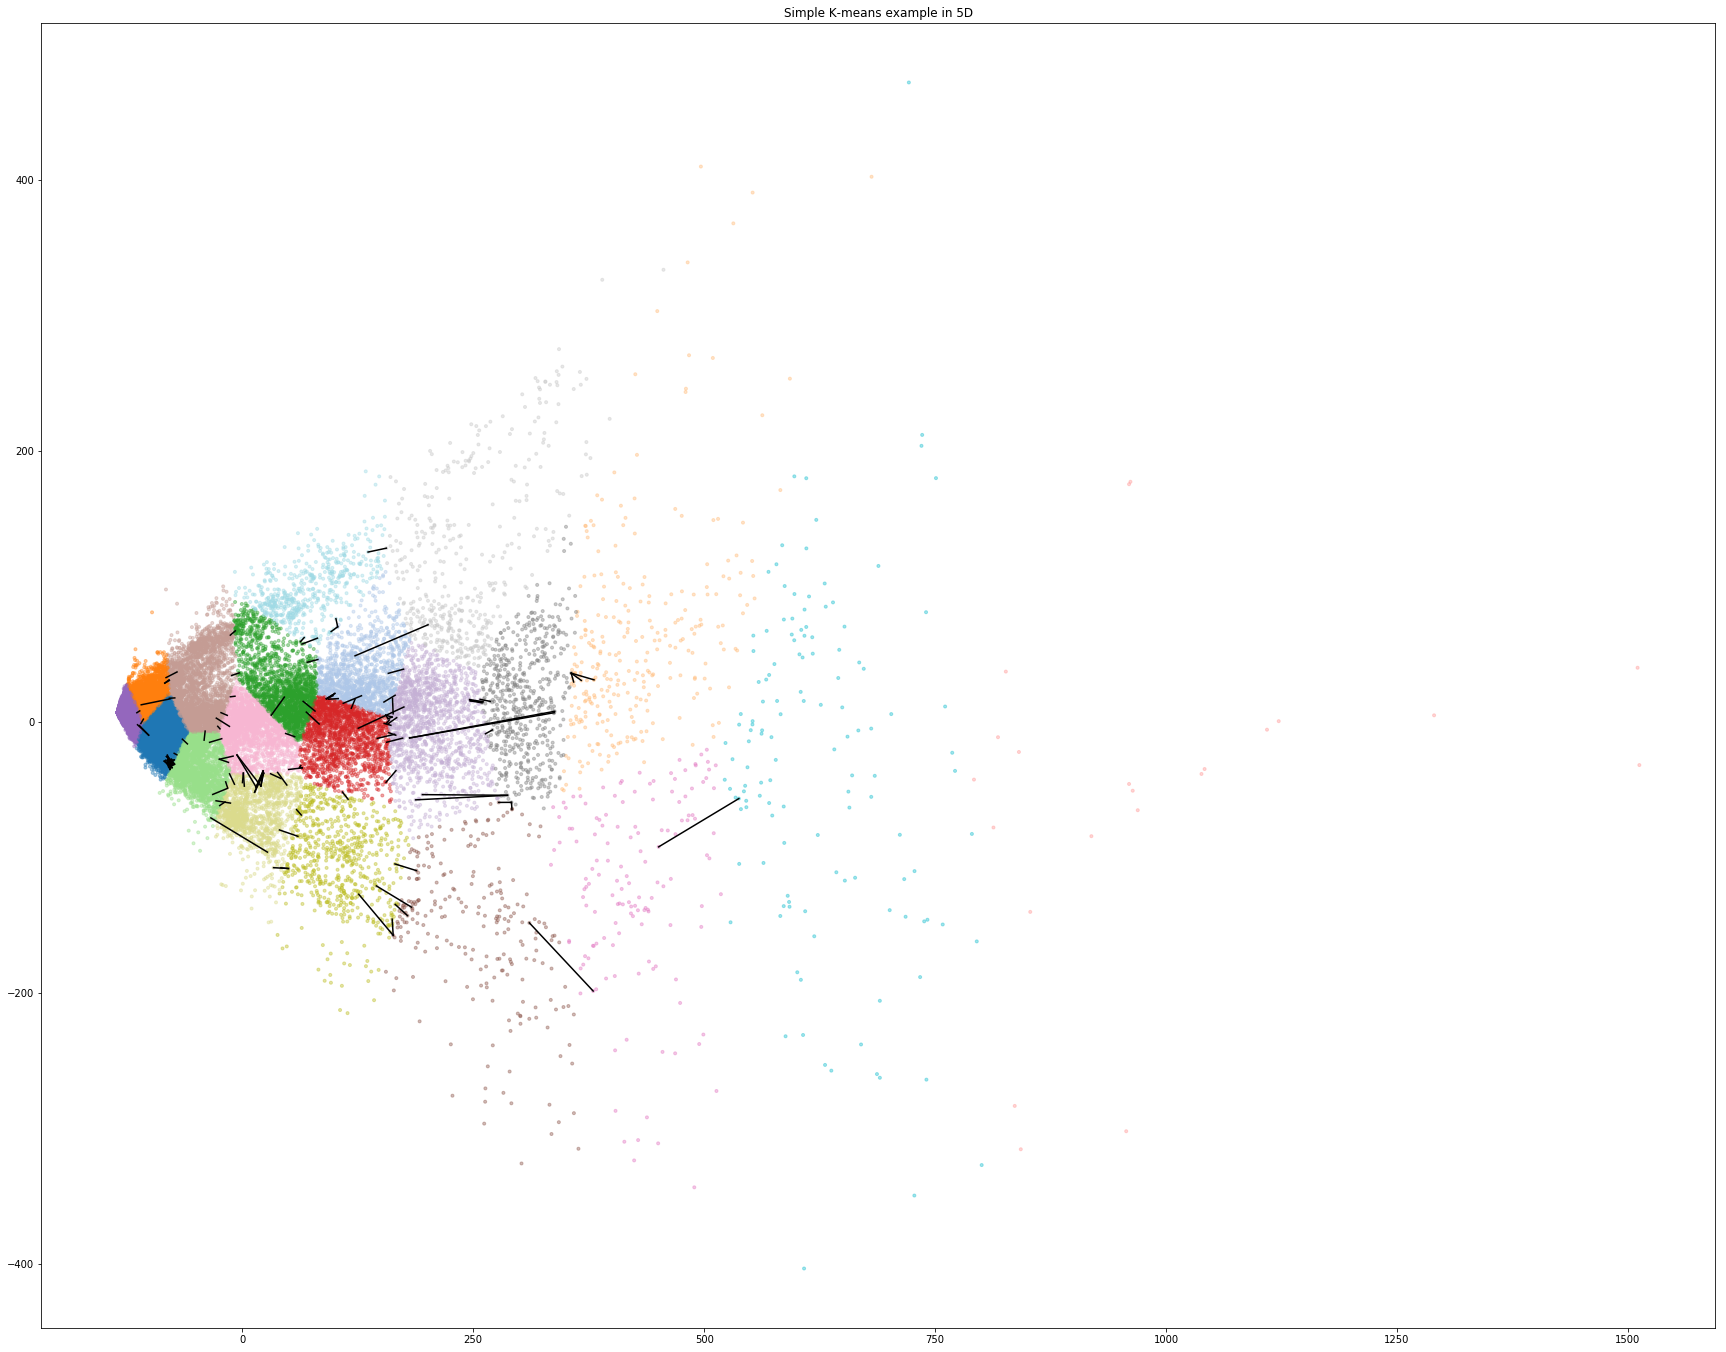

In [111]:
fig, ax = plt.subplots()
ax.set_title('Simple K-means example in 5D')
plt.scatter(new.T[0], new.T[1], c=kmeans.labels_, alpha=0.4, marker='.', cmap='tab20')

s = 0
for p in gg:
    l1 = kmeans.labels_[p[0]]
    l2 = kmeans.labels_[p[1]]
    if l1 != l2: # and l2 not in closest_cluster[l1]:
        ee = np.vstack([new[p[0]], new[p[1]]]).T
        s += 1
        plt.plot(ee[0], ee[1], c='black')
print(s)

In [112]:
hh = pairwise_distances(vectors)

In [113]:
np.max(hh)

1652.7156440234962

In [117]:
np.argwhere((qscores > 0.98) & (hh > 200))

array([[ 1167,  5298],
       [ 4984, 10284],
       [ 5298,  1167],
       [ 5298,  5338],
       [ 5338,  5298],
       [ 6024, 10323],
       [10284,  4984],
       [10323,  6024],
       [16190, 27378],
       [26442, 27378],
       [27378, 16190],
       [27378, 26442]])

In [118]:
print(vectors[1167])
print(vectors[5298])

[ 62  18  24 242 311  17 198  25   1  23  85  36  35  64  89   0   0   0
   0   0   7   1   0   0   6  49]
[ 14   9   7 199 169   1  59  11  51 153 165  54 118 121  27   1  10  11
  13  11  52  15   2  15  17 123]


In [21]:
good_ids = []
with open ('good_ids.txt') as f:
    for line in f:
        good_ids.append(line.strip())

In [121]:
print(good_ids[1167])
print(good_ids[5298])

1CLE:A
1LLF:A


In [123]:
np.linalg.norm(vectors[1167] - vectors[5298])

305.16389039334257

In [125]:
print(good_ids[10323])
print(good_ids[6024])

1W7C:A
1N9E:C


In [6]:
vectors_new = np.loadtxt('good_vectors30k_new.txt', delimiter=',', dtype=np.int_)

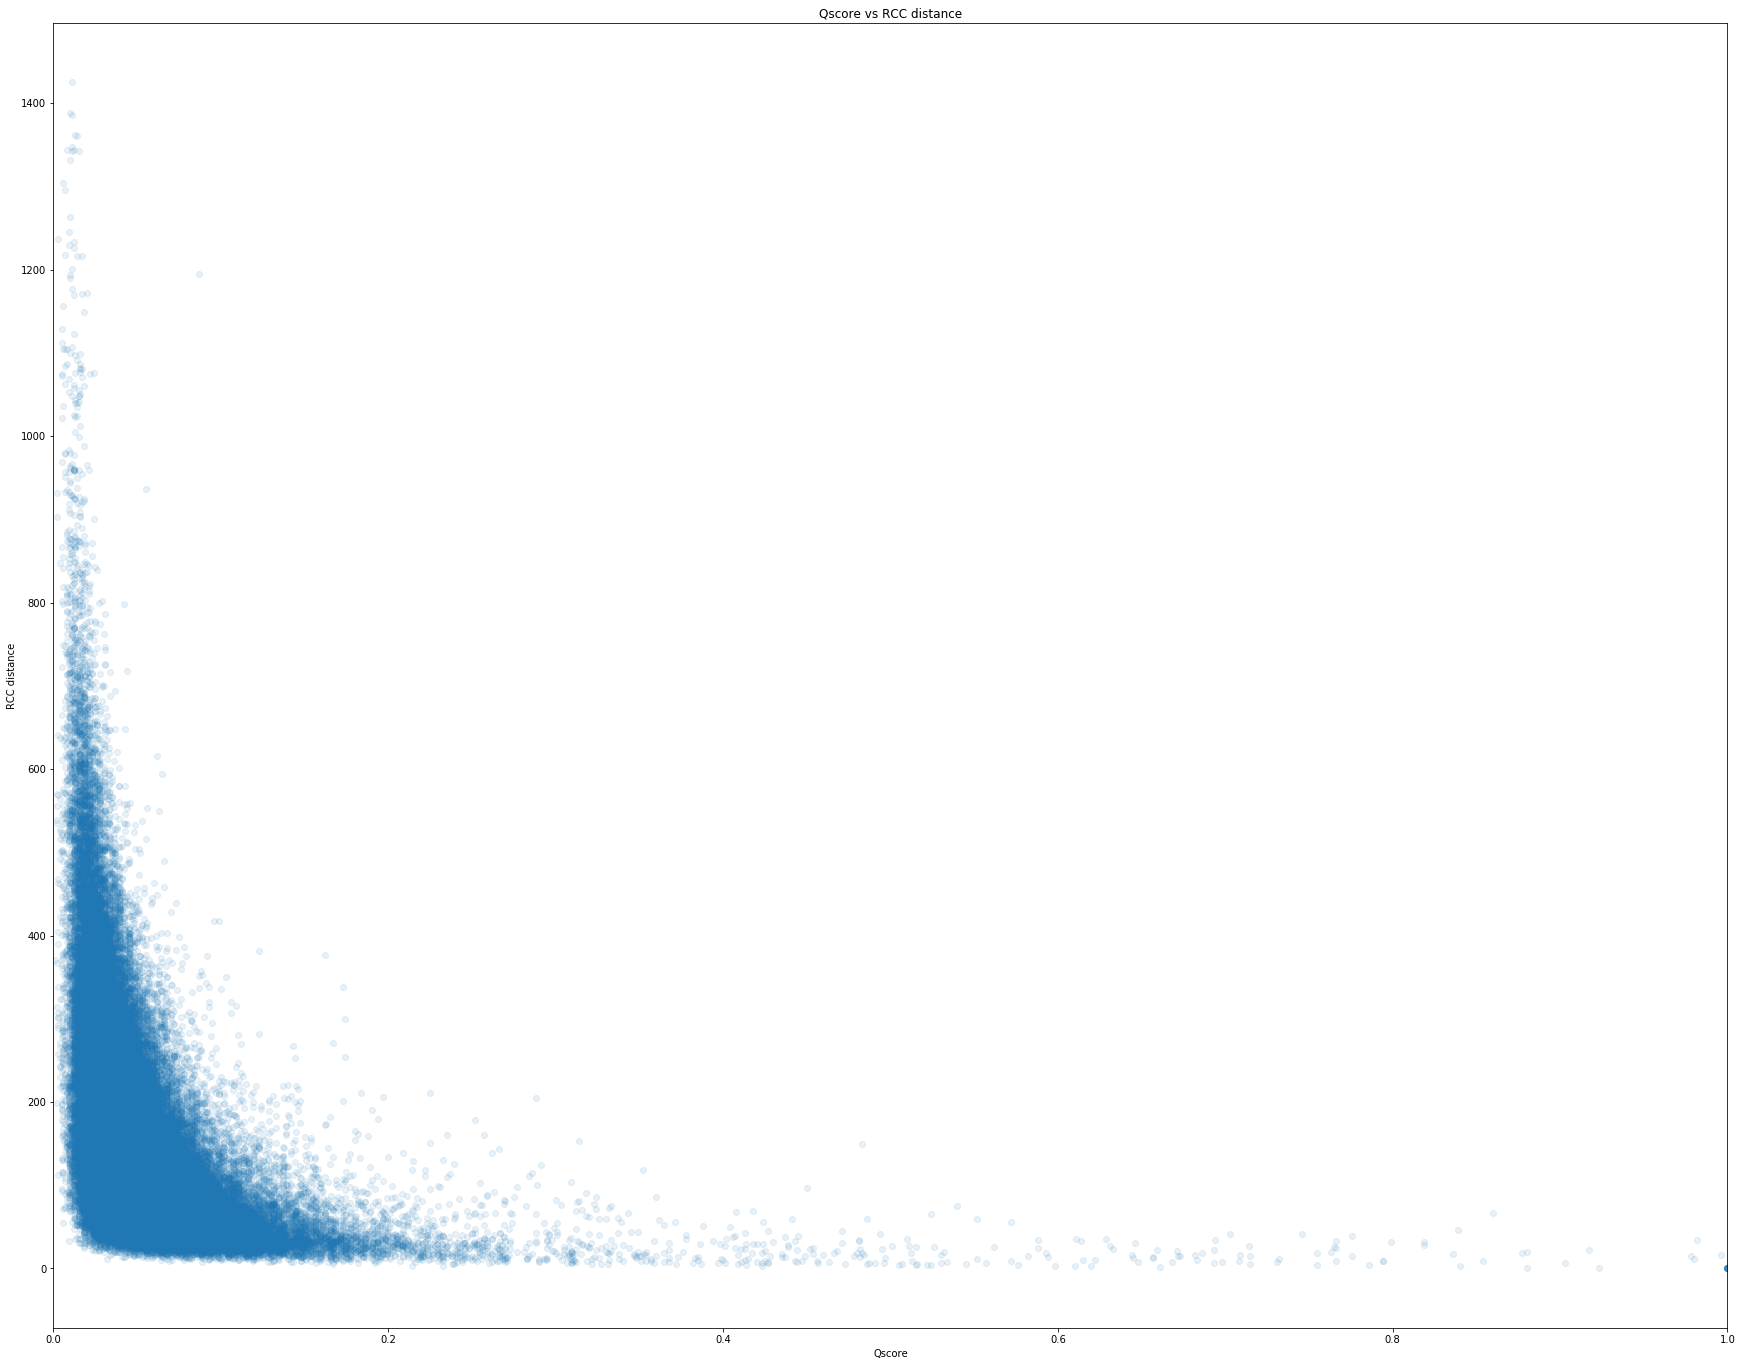

In [23]:
distances_new = pairwise_distances(vectors_new[:MAX_SIZE])
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_title('Qscore vs RCC distance')
ax.set_xlabel('Qscore')
ax.set_ylabel('RCC distance')
plt.scatter(qscores[indices], distances_new[indices], alpha=0.1)

In [12]:
distances_new = pairwise_distances(vectors_new)

In [16]:
np.argwhere((qscores > 0.8) & (distances_new > 200))

array([[ 1503,  4872],
       [ 1503, 21532],
       [ 3587,  8185],
       [ 3587,  9202],
       [ 3587, 16891],
       [ 3587, 16892],
       [ 3587, 21464],
       [ 3587, 21465],
       [ 3587, 21467],
       [ 3587, 21469],
       [ 3587, 25246],
       [ 3587, 27934],
       [ 3587, 27957],
       [ 3587, 27990],
       [ 4872,  1503],
       [ 8185,  3587],
       [ 9202,  3587],
       [11200, 24011],
       [16891,  3587],
       [16892,  3587],
       [21464,  3587],
       [21465,  3587],
       [21467,  3587],
       [21469,  3587],
       [21532,  1503],
       [24011, 11200],
       [25246,  3587],
       [27887, 27926],
       [27926, 27887],
       [27934,  3587],
       [27957,  3587],
       [27990,  3587]])

In [17]:
print(vectors_new[1503])
print(vectors_new[4872])

[ 30  24  85   4  32  12 141  30   0   0   5   5   0  60 171   0   0   0
   0   0   0   0   0   1   3 101]
[101  17  44 180 330  23 214  25   3  22  59  22  25  69 146   0   0   1
   0   0   3   2   0   2   9 140]


In [18]:
print(vectors[1503])
print(vectors[4872])

[ 30  24  85   4  32  12 141  30   0   0   5   5   0  60 171   0   0   0
   0   0   0   0   0   1   3 101]
[101  17  44 180 330  23 214  25   3  22  59  22  25  69 146   0   0   1
   0   0   3   2   0   2   9 140]


In [22]:
print(good_ids[1503])
print(good_ids[4872])

1DFK:A
1KK7:A
